# Sonar Equations Visualization

This is a visualization of the sonar equations. You can see how of Echo Levels and Noise Mask Levels act as a function of range given that other terms in the equation are set to some predetermined constant.

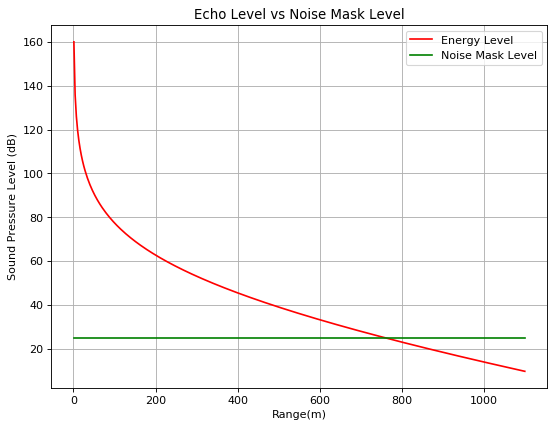

In [49]:
import numpy as np  
import matplotlib.pyplot as plt  
from math import log10
from matplotlib.pyplot import figure

# The active sonar equation is expressed as
# SL - 2 * TL(R) + TS = NL - DI + DT

### Change these values to observe changes in the plotting ###

a = 13 # alpha (dB/km)

sl = 200 # source level (dB)
ts = -40 # target strength (dB)
nl = 35 # noise level (dB)
di = 30 # directivity index (dB)
dt = 20 # detection threshold (dB)

######

r = np.arange(1, 1100, 3)

def tl(r):
    """Calculates transmission loss as a function of r"""
    return 20 * log10(r) + ((a / 1000) * r)

def el(r):
    """Calculates energy level based on range"""
    return sl - 2 * tl(r) + ts

def nml(r):
    """Calculates noise mask level based on range"""
    return nl - di + dt


figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(list(r), [el(r1) for r1 in r], 'r-', label="Energy Level")
plt.plot(list(r), [nml(r) for _ in r], 'g-', label="Noise Mask Level")
plt.grid()

plt.title("Echo Level vs Noise Mask Level")
plt.xlabel("Range(m)")
plt.ylabel("Sound Pressure Level (dB)")

plt.legend()
plt.show()